# Most Dominant Color
1.Get the image using cv2
2.Define number of clusters(dominant colors)
3.Intialize k means clusters

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import cv2

(640, 1024, 3)


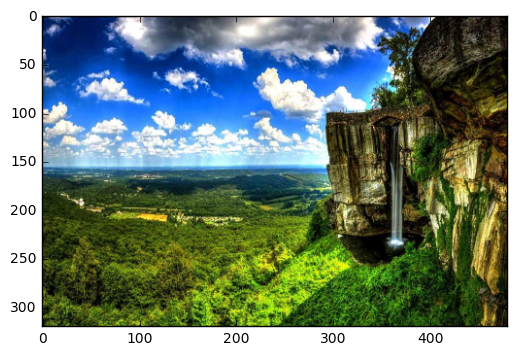

(153600, 3)


In [15]:
img=cv2.imread('./im.jpg')
print img.shape
img=cv2.resize(img,(480,320))
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
image_vector = img.reshape((img.shape[0] * img.shape[1], img.shape[2]))
data_std=image_vector
print image_vector.shape

In [16]:
def dist(x1,x2):
    return np.sqrt(((x1-x2)**2).sum())

In [96]:
labels=[]
def KMeansClustering(X_data, k=2, stop_iter=10, def_clusters=None):
    dim = X_data.shape[1]
    
    if def_clusters is None:
        centers = np.random.uniform(low=X_data.min(), high=X_data.max(), size=(k, dim))
        clusters = {}
        for kx in range(k):
            clusters[kx] = {
                'center': centers[kx, :],
                'points': []
            }
    else:
        clusters = def_clusters
    
    curr_iter = 0
    stop = False
    while (not stop):
        for px in range(X_data.shape[0]):
            distance_px = []
            for kx in range(k):
                distance_px.append(dist(X_data[px, :], clusters[kx]['center']))
            distance_px = np.asarray(distance_px)
            c_id = distance_px.argmin()
            
            clusters[c_id]['points'].append(X_data[px, :])
            if(curr_iter==stop_iter-1):
                labels.append(c_id)
        # plt.figure(0)
        # cols = ['red', 'green', 'blue', 'yellow', 'pink']
        
        for kx in range(k):
            pts = np.asarray(clusters[kx]['points'])
            # plt.scatter(pts[:, 0], pts[:, 1], color=cols[kx])
            # plt.scatter(clusters[kx]['center'][0], clusters[kx]['center'][1], color='black')
            c = clusters[kx]['center']
            if len(clusters[kx]['points']) == 0:
                pass
            else:
                clusters[kx]['center'] = pts.mean(axis=0)
            # shifts[kx].append(dist(clusters[kx]['center'], c))
            clusters[kx]['points'] = []
        curr_iter += 1
        
        if (curr_iter >= stop_iter):
            stop = True
    return clusters

In [97]:
main_centers = KMeansClustering(data_std, k=15, stop_iter=10)

In [98]:
print main_centers
labels=np.asarray(labels)
print labels.shape

{0: {'points': [], 'center': array([ 165.70752143,  197.53497662,  222.81897896])}, 1: {'points': [], 'center': array([ 55.85892213,  70.71213437,  22.61757046])}, 2: {'points': [], 'center': array([ 233.68031616,  242.06351776,  240.92705457])}, 3: {'points': [], 'center': array([ 118.41544607,  135.84761059,  157.98091434])}, 4: {'points': [], 'center': array([ 197.0574086 ,  189.87716485,  113.14400257])}, 5: {'points': [], 'center': array([  80.32950306,  153.28503208,  237.5146993 ])}, 6: {'points': [], 'center': array([ 130.69396832,  144.60013018,   49.52061185])}, 7: {'points': [], 'center': array([ 166.13232606,   51.20931578,  190.93135409])}, 8: {'points': [], 'center': array([ 168.73391733,  209.9482617 ,   32.64494936])}, 9: {'points': [], 'center': array([ 252.43495253,   40.28615343,  120.23862683])}, 10: {'points': [], 'center': array([  69.01949115,   93.95268561,  103.59336408])}, 11: {'points': [], 'center': array([   7.56908917,   50.78687545,  121.35536696])}, 12: 

(15, 3)


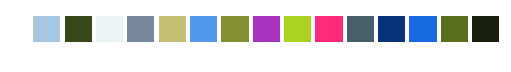

In [105]:
colors=[]
for kx in range(15):
    colors.append(255-main_centers[kx]['center'].astype("uint8"))
colors=np.asarray(colors)

print colors.shape
plt.figure(0)
for cols in range(colors.shape[0]):
    cl = np.zeros((20, 20, 3))
    cl[:, :, :] = colors[cols]
    plt.subplot(1, 15, cols+1)
    plt.axis("off")
    plt.imshow(cl)
plt.show()

153600


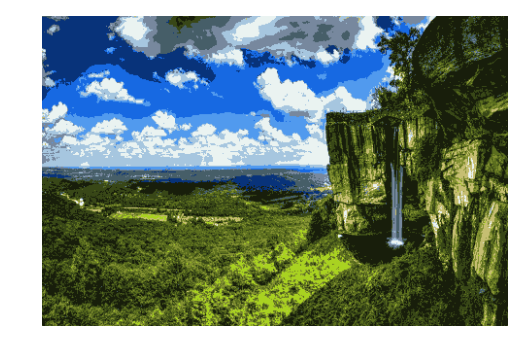

In [106]:
new_im = np.zeros((image_vector.shape))
print new_im.shape[0]
for ix in range(new_im.shape[0]):
    new_im[ix, :] = colors[labels[ix]]

new_im = new_im.reshape(img.shape)

plt.figure(0)
plt.axis("off")
plt.imshow(new_im)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  8, 10, 11, 12, 13, 14]), array([10264, 29948, 10501,  6759,  3118,  6701,  9218,  3653,  6721,
        8366, 10877, 17619, 29855]))
(13,)


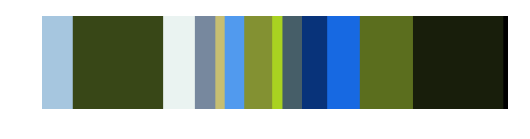

In [113]:
#Showing percentages of each colour in the picture

dom_cols = np.unique(labels, return_counts=True)
print dom_cols
lab = dom_cols[0]
print lab.shape
hist = dom_cols[1].astype("float")/dom_cols[1].sum()

col_sp = np.zeros((100, 500, 3))

start = 0
for (col, percent) in zip(lab, hist):
    # print percent
    end = int(start + percent*col_sp.shape[1])
    # print end
    col_sp[:, start:end, :] = colors[col]
    start = end

plt.figure(0)
plt.axis("off")
plt.imshow(col_sp)

plt.show()